In [3]:
# Heading 1
## Subheading 1.1
### Subheading 1.1.1
## Subheading 1.2
# Heading 2


# Project 3


#
**Problem Statement**
- Is it clear what the goal of the project is?
- What type of model will be developed?
- How will success be evaluated?
- Is the scope of the project appropriate?
- Is it clear who cares about this or why this is important to investigate?
- Does the student consider the audience and the primary and secondary stakeholders?

## Problem Statment: 

## 1. Using PRAW, you'll collect posts from two subreddits of your choosing.

In [135]:
#python -m pip install praw
import praw
import pandas as pd
import nltk
import pandas as np
import unicodedata
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
from sklearn.model_selection import train_test_split 
from textblob import Word
import numpy as np
import spacy
import re
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [5]:
reddit = praw.Reddit(
    client_id='zus9cDU7x8IncmqOLReFYA',
    client_secret='3O1U8qnB3GGxPE4UtM3tpTq1qMuXfA',
    user_agent='Pro3',
    username='-__A__-',
    password=''
)

In [6]:
# Below is JUST an example of how you can use PRAW

# Choose your subreddit
subreddit_DataScience = reddit.subreddit('DataScience')
subreddit_wallstreetbets = reddit.subreddit('wallstreetbets')

# Adjust the limit as needed -- Note that this will grab the 25 most recent posts
posts_DS = subreddit_DataScience.new(limit=1525)
posts_wsb = subreddit_wallstreetbets.new(limit=1525)

In [7]:
data = []
for post in posts_DS:
    data.append([post.created_utc, post.title, post.selftext, post.subreddit])

# Turn into a dataframe
boardgames = pd.DataFrame(data, columns = ['created_utc', 'title', 'self_text', 'subreddit'])
boardgames.head()

,created_utc,title,self_text,subreddit
0,1.697746e+09,Plotting and sorting engineering raw data cont...,"Hi,\n\nI often analyze many engineering data c...",datascience
1,1.697744e+09,Which city in the USA has the most Asian male ...,,datascience
2,1.697744e+09,Careers in DS and mechanics,"I am about to graduate with a Bachelors in DS,...",datascience
3,1.697741e+09,Predictive vs Explanatory modeling,In my past work I've become familiar with vari...,datascience
4,1.697741e+09,What tech job to get before becoming Data Anal...,I’ve been studying Data Science for quite some...,datascience


In [8]:
data_wsb = []
for post in posts_wsb:
    data_wsb.append([post.created_utc, post.title, post.selftext, post.subreddit])

# Turn into a dataframe
boardgames_wsb = pd.DataFrame(data_wsb, columns = ['created_utc', 'title', 'self_text', 'subreddit'])
boardgames_wsb.head()

,created_utc,title,self_text,subreddit
0,1.697747e+09,"UP $550,000 OVER PAST WEEK TRADING SPY 0DTE",I know this may seem fake but over the past we...,wallstreetbets
1,1.697747e+09,INTEL CORP.-ISREAL EXPOSURE PUTS??,How does this bode for Intel Corporation ? Put...,wallstreetbets
2,1.697747e+09,TSLA is a conglomerate not a auto company. Sto...,Tesla is more comparable to General Electric r...,wallstreetbets
3,1.697746e+09,"I'm going to withdraw 100k tomorrow, What perc...",&#x200B;\n\n[How much money should i put on si...,wallstreetbets
4,1.697746e+09,Amazon earnings,Hi friends!\n\nIs anyone holding Amazon going ...,wallstreetbets


In [9]:
df = pd.concat([boardgames, boardgames_wsb])


In [10]:
df.subreddit.value_counts()

datascience       856
wallstreetbets    735
Name: subreddit, dtype: int64

In [11]:
df.head()

,created_utc,title,self_text,subreddit
0,1.697746e+09,Plotting and sorting engineering raw data cont...,"Hi,\n\nI often analyze many engineering data c...",datascience
1,1.697744e+09,Which city in the USA has the most Asian male ...,,datascience
2,1.697744e+09,Careers in DS and mechanics,"I am about to graduate with a Bachelors in DS,...",datascience
3,1.697741e+09,Predictive vs Explanatory modeling,In my past work I've become familiar with vari...,datascience
4,1.697741e+09,What tech job to get before becoming Data Anal...,I’ve been studying Data Science for quite some...,datascience


### 

In [12]:
#df['subreddit'] = df['subreddit'].map({'wallstreetbets': 0 , 'datascience': 1})

### Shuffling the DataFrame 

In [13]:
df = df.sample(frac = 1)
df[:10]

,created_utc,title,self_text,subreddit
255,1.697253e+09,JC says the quiet part out loud.,I shouldn’t say that.,wallstreetbets
566,1.696613e+09,pdt is responsible for losses.,"Let me tell you, if it wasn’t for this dumb as...",wallstreetbets
104,1.697647e+09,Finding intrinsic value of a stock...any tips?,I am new to the stock game so my current stra...,wallstreetbets
388,1.695935e+09,Machine Learning pays 15-40% more than Data Sc...,,datascience
365,1.696012e+09,"When a ML algorithm is training, what is actua...",Basically the question. When we run say logist...,datascience
60,1.697501e+09,How can I do an AI Training for my team withou...,My company is starting to roll out AI tools (t...,datascience
676,1.696466e+09,What % of your paycheck/salary goes straight i...,I’ve seen a lot of variance on this sub regard...,wallstreetbets
705,1.696414e+09,"Daily Discussion Thread for October 04, 2023",**Join [WSB's community voice chat](https://di...,wallstreetbets
415,1.696959e+09,AMC,AMC stock price was up 11% Friday after it had...,wallstreetbets
633,1.696539e+09,Stock down after good news,Bought calls on AEHR before earnings. Earnings...,wallstreetbets


### Fearture engineering and pre-processing

Merging title and self_text

In [14]:
df['post'] = df.apply(lambda row: f"title: {row['title']} text: {row['self_text']}", axis=1)
df.head()

,created_utc,title,self_text,subreddit,post
255,1.697253e+09,JC says the quiet part out loud.,I shouldn’t say that.,wallstreetbets,title: JC says the quiet part out loud. text: ...
566,1.696613e+09,pdt is responsible for losses.,"Let me tell you, if it wasn’t for this dumb as...",wallstreetbets,title: pdt is responsible for losses. text: Le...
104,1.697647e+09,Finding intrinsic value of a stock...any tips?,I am new to the stock game so my current stra...,wallstreetbets,title: Finding intrinsic value of a stock...an...
388,1.695935e+09,Machine Learning pays 15-40% more than Data Sc...,,datascience,title: Machine Learning pays 15-40% more than ...
365,1.696012e+09,"When a ML algorithm is training, what is actua...",Basically the question. When we run say logist...,datascience,"title: When a ML algorithm is training, what i..."


In [15]:
df.drop(['title','self_text', 'created_utc'], axis=1, inplace=True)

In [16]:
df.head()

,subreddit,post
255,wallstreetbets,title: JC says the quiet part out loud. text: ...
566,wallstreetbets,title: pdt is responsible for losses. text: Le...
104,wallstreetbets,title: Finding intrinsic value of a stock...an...
388,datascience,title: Machine Learning pays 15-40% more than ...
365,datascience,"title: When a ML algorithm is training, what i..."


### Preprocessing
I making use of Regex to remove numbers and links from the post and creating a new column called cleaned post with processed text.

In [17]:
pattern = r'\b\d+\b|http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
df['cleaned_post'] = df['post'].replace(pattern, '', regex=True)

# EDA
* Starting off with highest single word count.
* Highest bigrams count
* Highest trigram count

In [18]:
#intialize Coutvector
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer

#intitialize CountVectorizer 
vectorizer = CountVectorizer()

In [19]:
#fit 
wm = vectorizer.fit_transform(df['cleaned_post'])

In [20]:
wm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [21]:
df_vect_ex = pd.DataFrame(wm.toarray(), columns= vectorizer.get_feature_names_out(), index=df.index)

In [22]:
df_vect_ex

,06pm,0dte,0dtes,0s,0t,0th,1000s,100_000_000,100b,100bps,...,za,zero,zhang,zhuzh,zig,zillow,zone,zones,zoom,zoomer
255,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
388,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
650,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df_vect_ex['target_subreddit'] = df['subreddit']

In [24]:
Count_w = df_vect_ex.drop('target_subreddit', axis=1).sum().sort_values(ascending = False)

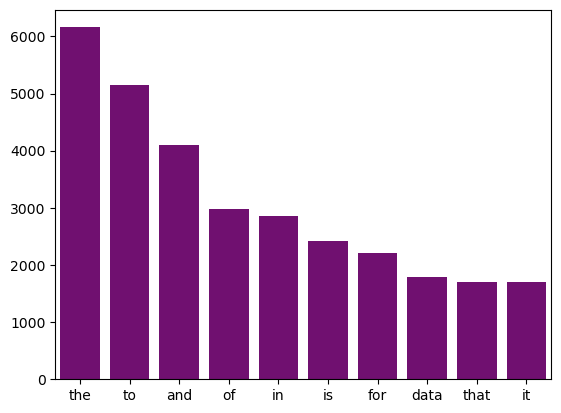

In [25]:
import seaborn as sns
sns.barplot(x=Count_w.index[:10], y = Count_w[:10], color='purple')
plt.show()

stop_words{‘english’}, list, default=None
If ‘english’, a built-in stop word list for English is used. There are several known issues with ‘english’ and you should consider an alternative (see Using stop words).

If a list, that list is assumed to contain stop words, all of which will be removed from the resulting tokens. Only applies if analyzer == 'word'.
If None, no stop words will be used. In this case, setting max_df to a higher value, such as in the range (0.7, 1.0), can automatically detect and filter stop words based on intra corpus document frequency of terms.

In [26]:
def gettopten(df):
    nv = CountVectorizer(stop_words='english', token_pattern= (r'\b(?!http\b|https\b|www\b|ftp\b)(?<!http)(?<!https)(?<!www)(?<!ftp)'
           r'\b[^\d\W]+\b(?!.[a-zA-Z0-9]+\b)'))
    nvv = nv.fit_transform(df['cleaned_post'])
    df_no = pd.DataFrame(nvv.toarray(), columns= nv.get_feature_names_out(), index= df.index)
    new_count = df_no.sum().sort_values(ascending=False)
    return sns.barplot(x=new_count.index[:10],y=new_count[:10], palette='colorblind') 


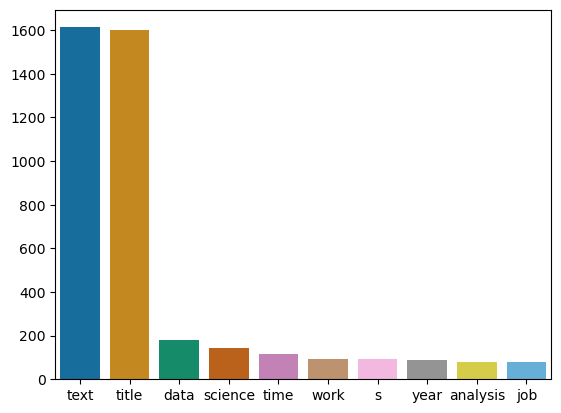

In [27]:
gettopten(df)
plt.show()

## Now we will check top 10 word counts in each subreddit

In [28]:
df[df['subreddit'] == 'datascience']

,subreddit,post,cleaned_post
388,datascience,title: Machine Learning pays 15-40% more than ...,title: Machine Learning pays -% more than Data...
365,datascience,"title: When a ML algorithm is training, what i...","title: When a ML algorithm is training, what i..."
60,datascience,title: How can I do an AI Training for my team...,title: How can I do an AI Training for my team...
251,datascience,"title: Should we use non-linear models for ""li...","title: Should we use non-linear models for ""li..."
646,datascience,title: Catastrophic Forgetting text: It is a p...,title: Catastrophic Forgetting text: It is a p...
...,...,...,...
168,datascience,title: James Lamb (Light GBM) on getting into ...,title: James Lamb (Light GBM) on getting into ...
594,datascience,title: Any tips to find fully remote jobs? tex...,title: Any tips to find fully remote jobs? tex...
695,datascience,title: Settle an argument text: We have a data...,title: Settle an argument text: We have a data...
650,datascience,"title: Business questions wiki text: Hi, does ...","title: Business questions wiki text: Hi, does ..."


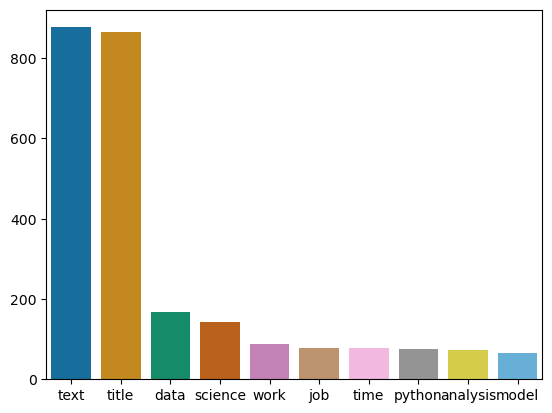

In [29]:
gettopten(df[df['subreddit'] == 'datascience'])
plt.show()

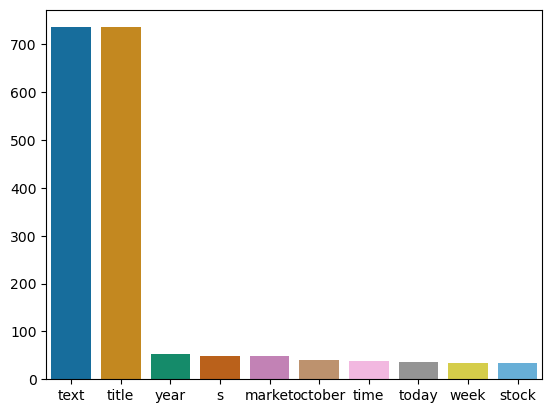

In [30]:
gettopten(df[df['subreddit'] == 'wallstreetbets'])
plt.show()

### We will use countvectorizer with ngram_range:
* ngram_range = (1,1) -> To do EDA on unigrams
* ngram_range = (2,2) -> To do EDA on bigrams
* ngram_range = (3,3) -> To do EDA on bigrams

In [31]:
def gettop10(df,n,stop='english'):
    cvec = CountVectorizer(ngram_range=(n,n), stop_words= stop)

    nvv = cvec.fit_transform(df['cleaned_post'])
    df_no = pd.DataFrame(nvv.toarray(), columns= cvec.get_feature_names_out(), index= df.index)
    new_count = df_no.sum().sort_values(ascending=False)
    plt.figure(figsize=(12,6))
    plt.tight_layout()
    return sns.barplot(x=new_count[:10],y=new_count.index[:10], palette='colorblind') 

## Top 10 highest occuring bigrams in the entire dataset

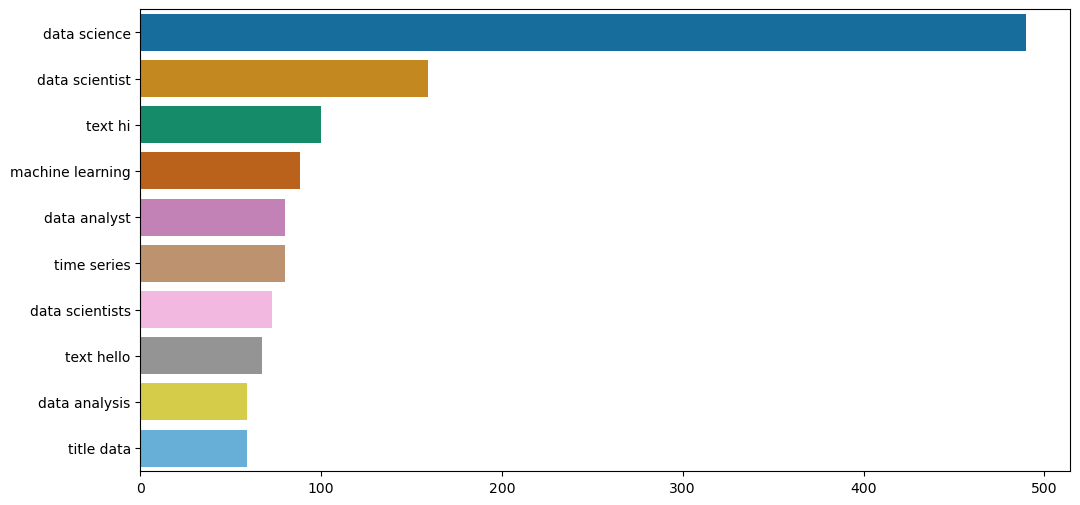

In [32]:
gettop10(df,2)
plt.show()

## Discovery:
There seems to be a word that appears frequently called `x200b`. Upon further investigation, this is the unicode for **whitespace character**. We will need to modify our post and remove this chracter with help of regex.

In [33]:
df['cleaned_post'] = df['cleaned_post'].replace(r'x200B|text|title|\n|\'', '', regex=True)

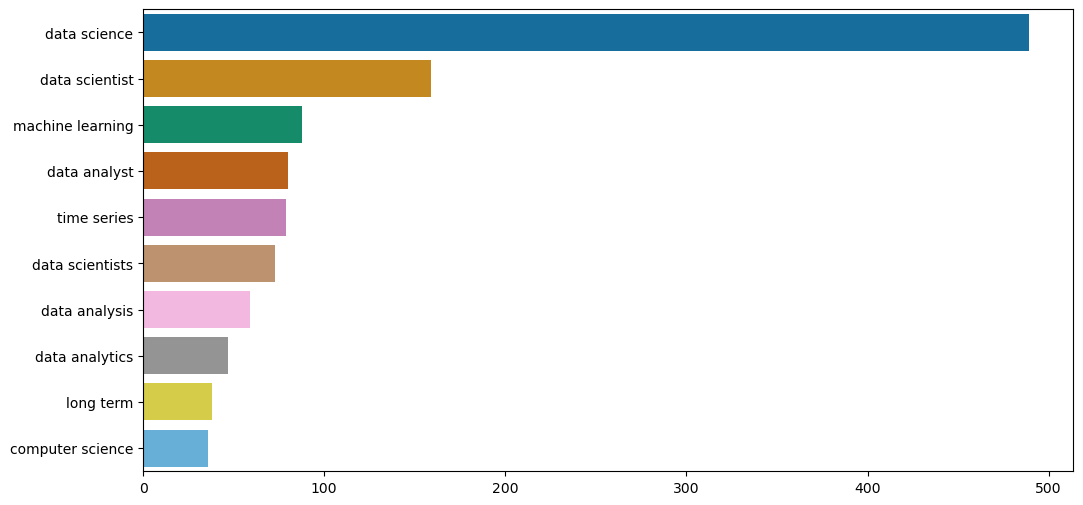

In [34]:
gettop10(df,2)
plt.show()

## Top 10 occurring bigrams in the wallstreetbets

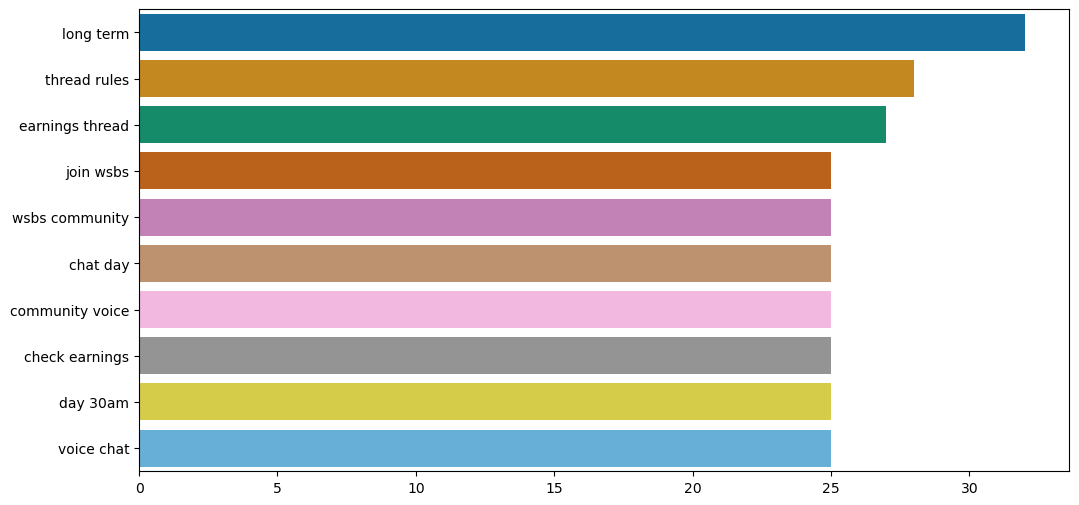

In [35]:
gettop10(df[df['subreddit'] == 'wallstreetbets'],2)
plt.show()

## Top 10 occurring bigrams in the datascience 

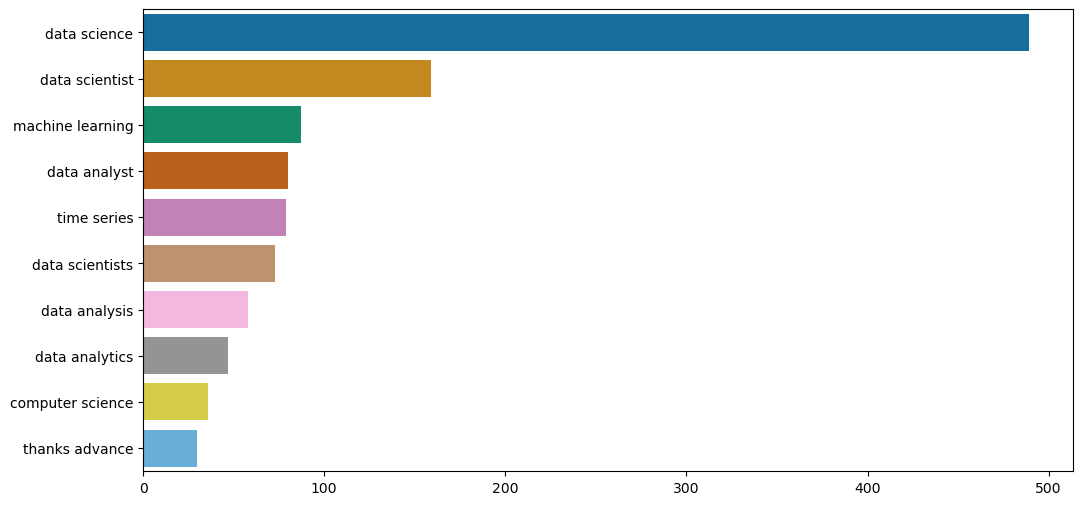

In [36]:
gettop10(df[df['subreddit'] == 'datascience'],2)
plt.show()

## Top 10 occurring trigrams in the wallstreetbets

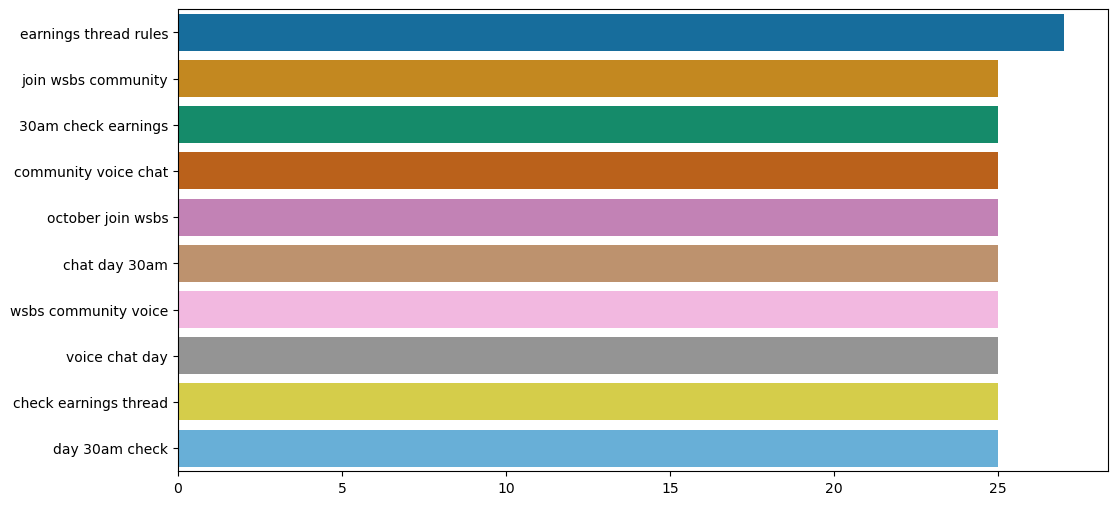

In [37]:
gettop10(df[df['subreddit'] == 'wallstreetbets'],3)
plt.show()

## Top 10 occurring trigrams in the datascience

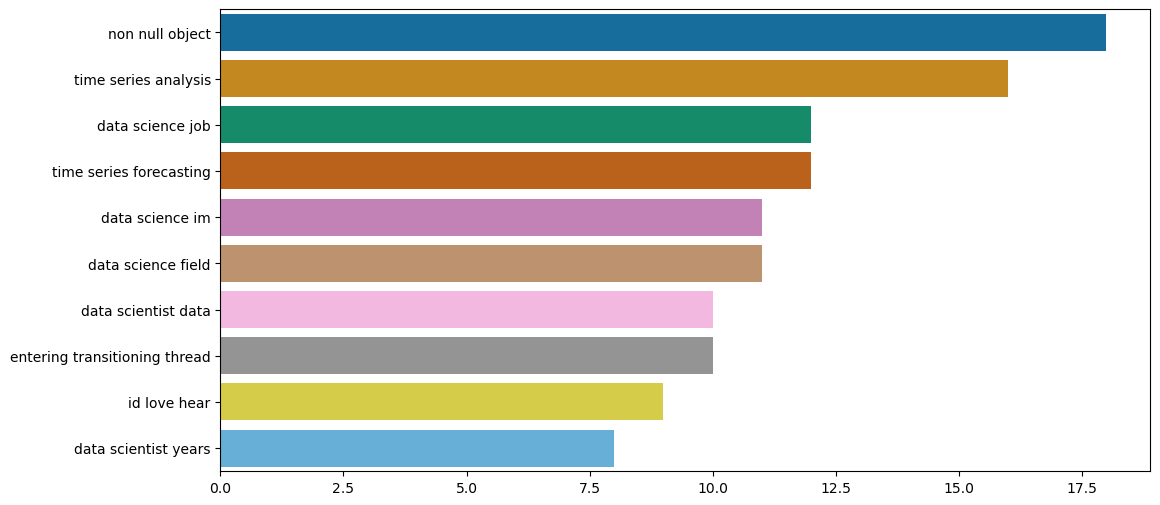

In [38]:
gettop10(df[df['subreddit'] == 'datascience'],3)
plt.show()

## Trigrams with stopwords

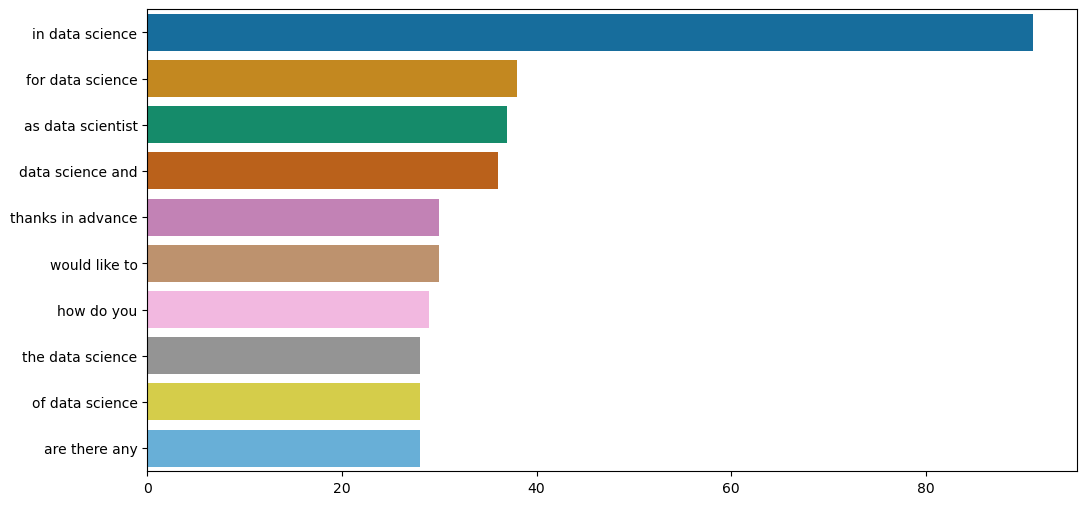

In [39]:
gettop10(df[df['subreddit'] == 'datascience'],3,stop=None)
plt.show()

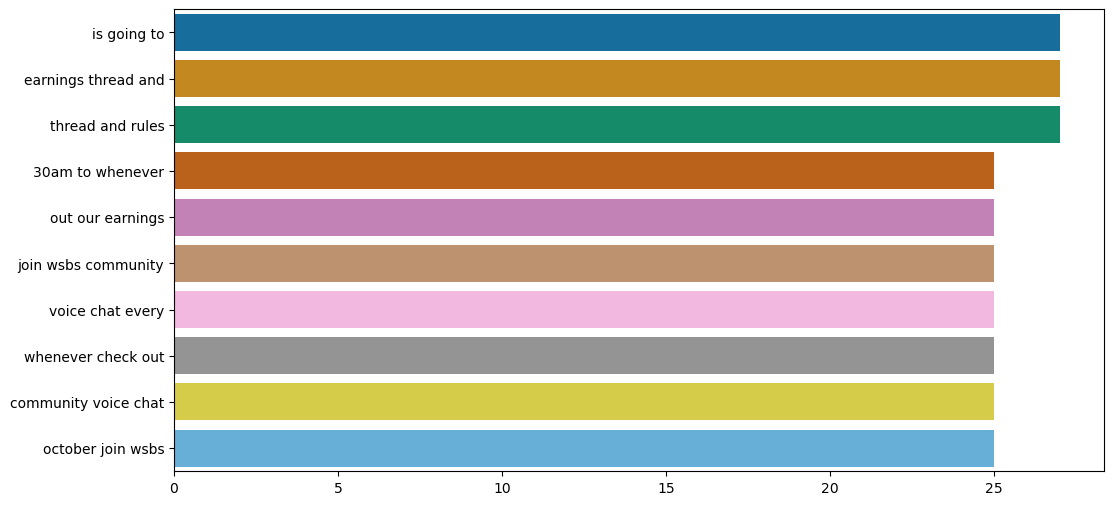

In [40]:
gettop10(df[df['subreddit'] == 'wallstreetbets'],3,stop=None)
plt.show()

## 4-gram with stopwords

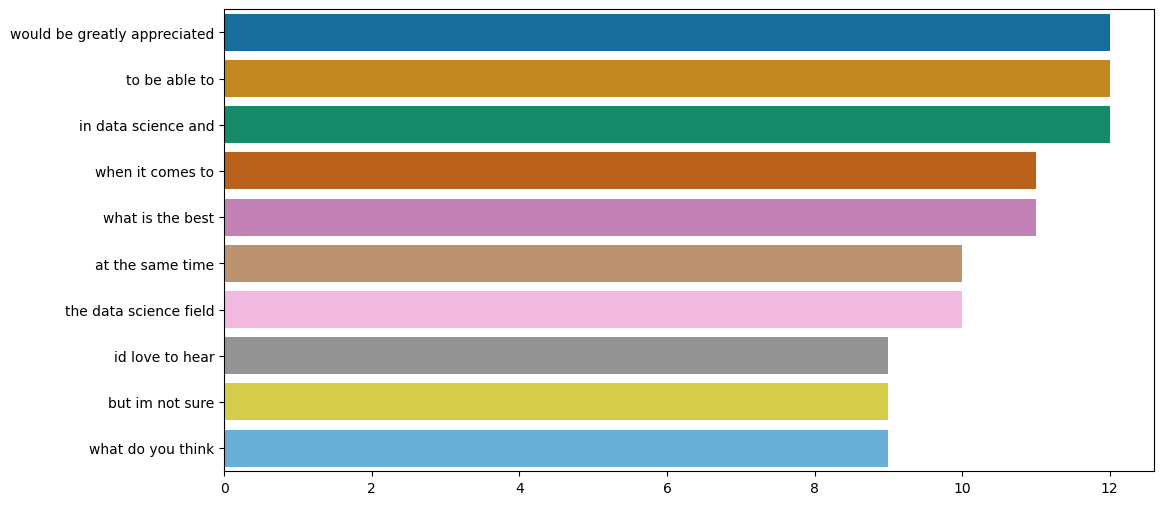

In [41]:
gettop10(df[df['subreddit'] == 'datascience'],4,stop=None)
plt.show()

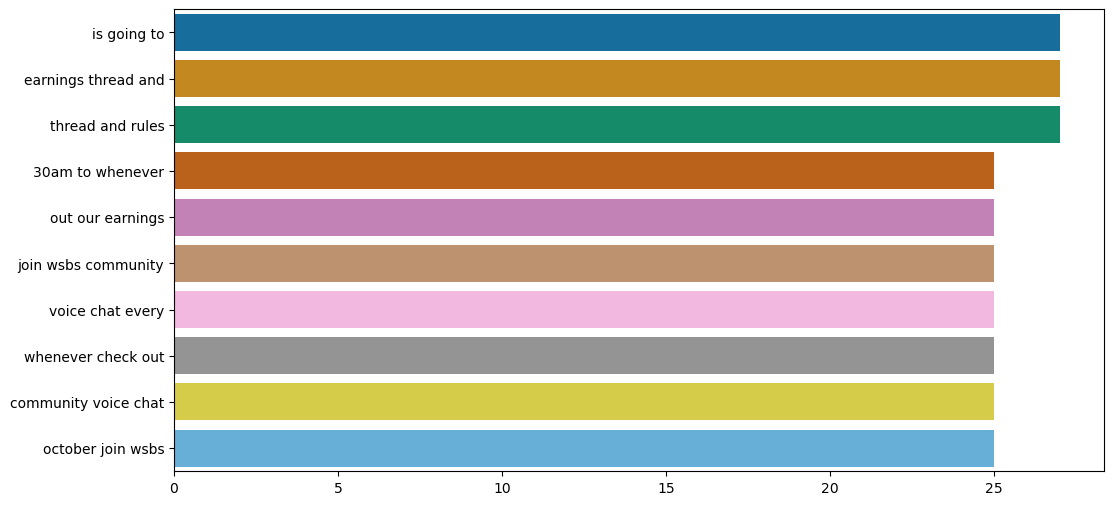

In [42]:
gettop10(df[df['subreddit'] == 'wallstreetbets'],3,stop=None)
plt.show()

## T-SNE Visulization

In [43]:
def tsne(df,n, stop='english'):
    cvec = CountVectorizer(ngram_range=(n,n), stop_words= stop)
    vectorized_matrix = cvec.fit_transform(df['cleaned_post'])
    df_vectorized_matrix = pd.DataFrame(vectorized_matrix.toarray(), columns= cvec.get_feature_names_out(), index= df.index)
    df_vectorized_matrix['Sne_lables']=df['subreddits']
    return  

In [44]:
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.feature_extraction.text import CountVectorizer
# import pandas as pd

# def tsne_viz(df, n, stop='english'):
#     # 1. Vectorize the text data
#     cvec = CountVectorizer(ngram_range=(n,n), stop_words=stop)
#     vectorized_matrix = cvec.fit_transform(df['cleaned_post'])
    
#     # 2. Compute t-SNE coordinates
#     tsne = TSNE(n_components=, random_state=42)
#     tsne_results = tsne.fit_transform(vectorized_matrix.toarray())
    
#     # 3. Plot the t-SNE coordinates
#     plt.figure(figsize=(12,8))
#     sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1], hue=df['subreddit'], palette="deep", edgecolor="w", s=60)
#     plt.title('t-SNE Visualization')
#     plt.xlabel('t-SNE Dimension 1')
#     plt.ylabel('t-SNE Dimension 2')
#     plt.show()

# # Sample usage
# # tsne_viz(your_dataframe, 1)


In [45]:
#tsne_viz(df, 3, stop='english')

In [46]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

def tsne_viz_3d(df, n, stop='english'):
    # 1. Vectorize the text data
    cvec = CountVectorizer(ngram_range=(n,n), stop_words=stop)
    vectorized_matrix = cvec.fit_transform(df['cleaned_post'])
    
    # 2. Compute t-SNE coordinates for 3D
    tsne = TSNE(n_components=3, random_state=42)
    tsne_results = tsne.fit_transform(vectorized_matrix.toarray())
    
    # 3. Plot the t-SNE coordinates in 3D
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111, projection='3d')
    
    scatter = ax.scatter(tsne_results[:,0], tsne_results[:,1], tsne_results[:,2], 
                         c=pd.factorize(df['subreddit'])[0], cmap="viridis", s=60)
    
    legend1 = ax.legend(*scatter.legend_elements(), title="Subreddits")
    ax.add_artist(legend1)
    
    ax.set_title('3D t-SNE Visualization')
    ax.set_xlabel('t-SNE Dimension 1')
    ax.set_ylabel('t-SNE Dimension 2')
    ax.set_zlabel('t-SNE Dimension 3')
    
    plt.show()

# Sample usage
# tsne_viz_3d(your_dataframe, 1)


c:\Users\muham\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\muham\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


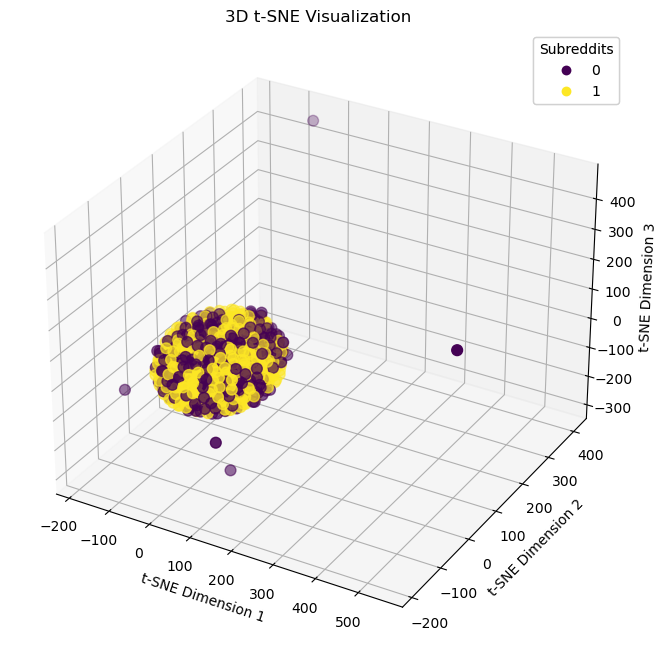

In [47]:
tsne_viz_3d(df, 3, stop='english')

In [48]:
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

def tsne_viz_3d_interactive(df, n, stop='english'):
    # 1. Vectorize the text data
    cvec = TfidfVectorizer(ngram_range=(n-1,n), stop_words=stop)
    vectorized_matrix = cvec.fit_transform(df['cleaned_post'])
    
    # 2. Compute t-SNE coordinates for 3D
    tsne = TSNE(n_components=3, random_state=42)
    tsne_results = tsne.fit_transform(vectorized_matrix.toarray())
    
    # Create a DataFrame for plotting
    df_tsne = pd.DataFrame(tsne_results, columns=['dim1', 'dim2', 'dim3'])
    df_tsne['subreddit'] = df['subreddit'].reset_index(drop=True)
    
    # 3. Plot using plotly
    fig = px.scatter_3d(df_tsne, x='dim1', y='dim2', z='dim3', color='subreddit')
    fig.show()

# Sample usage
# tsne_viz_3d_interactive(your_dataframe, 1)


In [49]:
tsne_viz_3d_interactive(df, 3, stop='english')

c:\Users\muham\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\muham\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [50]:
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

def tsne_viz_3d_interactive_with_index(df, n, stop='english'):
    # 1. Vectorize the text data
    cvec = TfidfVectorizer(ngram_range=(n-1,n), stop_words=stop)
    vectorized_matrix = cvec.fit_transform(df['cleaned_post'])
    
    # 2. Compute t-SNE coordinates for 3D
    tsne = TSNE(n_components=3, random_state=42)
    tsne_results = tsne.fit_transform(vectorized_matrix.toarray())
    
    # Create a DataFrame for plotting
    df_tsne = pd.DataFrame(tsne_results, columns=['dim1', 'dim2', 'dim3'])
    df_tsne['subreddit'] = df['subreddit'].reset_index(drop=True)
    df_tsne['index'] = df.index  # Add the index as a column
    
    # 3. Plot using plotly with hover data
    fig = px.scatter_3d(df_tsne, x='dim1', y='dim2', z='dim3', color='subreddit', hover_data=['index'])
    fig.show()

# Sample usage
# tsne_viz_3d_interactive_with_index(your_dataframe, 1)


In [51]:
tsne_viz_3d_interactive_with_index(df, 2, stop='english')

c:\Users\muham\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\muham\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [52]:
tsne_viz_3d_interactive_with_index(df, 3, stop='english')

c:\Users\muham\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\muham\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [53]:
df.iloc[35]['cleaned_post']

': Powell Speech Will Be Non-Event : Powell is speaking at  PM EST on Thursday. Next week is FOMC quiet week (No Fed speak), so Powell will be prepping the market for what they plan to do in Nov. All Fed officials who have talked, including the most hawkish ones like Logan and Waller, pointed to a pause in Nov to observe the data. Market will be looking for any comments related to the run up in  year rate over the last few months. The Fed is concerned about the  year rate run up causing a financial accident(and forcing them to do QE like UK did late ), so Powell will probably say that the  year rate is doing the Feds job for him. This will be clue for stabilization of the  year rate and potential market rally. Powell will also leave the Fed the option for a December rate hike by pointing out the recent strong data. Theres no more econ data except for GDP (which we already know will prob be strong) and PCE (which would probably be similar to CPI). I anticipate market will slightly hedge

In [54]:
df.iloc[291]['cleaned_post']

': A data science position is advertised as an internship and as a working student position, I could apply for both but where do I think my chances are better ? What would you do ? : '

In [55]:
df.iloc[520]['cleaned_post']

': Advice on Comparing Time Series Datasets : I am working on my masters degree and I have some data that I have no clue how to handle. Any advice would be appreciated.I have triaxial accelerometer data( hz) for some quadruped animal along with internal body temperature (every  minutes). I have multiple days worth of this data, and am trying to look at the affect of activity on body temperature. Ideally, we should see activity rise, followed by temperature, and both will fall together as well.I have already calculated energy: sqrt(x^ + y^ + x^) and averaged that for every  minutes, so the activity and temp intervals match. Is this a good approach?Also, how do I compare these datasets while accounting for the "lag" or affect of previous activity on current temperature? Im not having any luck searching for methods to analyze this data.Any help or suggestions are appreciated!'

In [56]:
df.iloc[463]['cleaned_post']

': -Year U.S. treasury yield : Why is the 20y yield (.%) higher than both the 10y yield (.%) and the 30y (.%) yield.?  Does the market really expect yields to rise between  and  and then fall again between -?  Why would anyone buy 30y bonds if 20y bonds yield much higher?  '

In [57]:
import re # Source Chat GPT

def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    
    # Remove Emojis
    emoji_pattern = re.compile(
        u"([\U00002600-\U000027BF])|"  # Misc symbols
        u"([\U0001F600-\U0001F64F])|"  # Emoticons
        u"([\U0001F300-\U0001F5FF])|"  # Symbols & pictographs
        u"([\U0001F680-\U0001F6FF])|"  # Transport & map symbols
        u"([\U0001F700-\U0001F77F])|"  # Alchemical symbols
        u"([\U0001F780-\U0001F7FF])|"  # Geometric shapes ext
        u"([\U0001F800-\U0001F8FF])|"  # Supplemental arrows C
        u"([\U0001F900-\U0001F9FF])|"  # Supplemental symbols
        u"([\U0001FA00-\U0001FA6F])|"  # Chess symbols
        u"([\U0001FA70-\U0001FAFF])"   # Symbols and pictographs ext A
        , re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    
    # Remove excessive whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Remove placeholder text
    text = re.sub(r'Daily Discussion Thread for [A-Za-z\s]+,', '', text)
    
    return text


In [58]:
df2 = df.copy()

In [59]:
df2['cleaned_post'] = df2['cleaned_post'].apply(clean_text)

In [60]:
tsne_viz_3d_interactive_with_index(df2, 3, stop='english')

c:\Users\muham\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\muham\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [61]:
df2.iloc[118]['cleaned_post']

':  : **Join **[WSBs community voice chat]( every day from :30am to whenever!**Check out our [Earnings Thread]( and [Rules]('

In [62]:
df2.iloc[406]['cleaned_post']

': Lookig for ideas in wholesale banking : Hi all,I am doing a course that requires a data science problem to be worked on form workplace. Id like to come up with something in wholesale banking but am coming up blank on what i can work on.Due to the role and team i work in i cant get ideas from my team members.Thoughts would be much appreciated!'

In [63]:
tsne_viz_3d_interactive_with_index(df2, 4, stop='english')

c:\Users\muham\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\muham\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [64]:
df2.iloc[463]["cleaned_post"]

': -Year U.S. treasury yield : Why is the 20y yield (.%) higher than both the 10y yield (.%) and the 30y (.%) yield.? Does the market really expect yields to rise between and and then fall again between -? Why would anyone buy 30y bonds if 20y bonds yield much higher?'

In [65]:
tsne_viz_3d_interactive_with_index(df2, 5, stop=None)

c:\Users\muham\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\muham\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



After further cleaning the text, we can see the that some of the outliers have been removed and the overall dimansanality of the tsne has been compressed.


## Modeling

In [232]:
X= df2['cleaned_post']
y=df2['subreddit'].reset_index(drop=True)
y= y.apply(lambda x: x.display_name)


In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

In [234]:

# pgrid = {
#     'tvec__stop_words': [None, 'english'],
#     'tvec__min_df': [1, 2, 3],
#     'tvec__ngram_range': [(1, 1), (1, 2), (2,2),(3,3)],
#     'logit__penalty': ['l1','l2'],
#     'logit__C': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5,10,50],
#     'logit__max_iter': [1000],
#     'logit__solver': ['lbfgs','liblinear']


# }


In [235]:
pgrid = {
    'tvec__stop_words': [None, 'english'],
    'tvec__min_df': [1, 2, 3],
    'tvec__ngram_range': [(1, 1)],
    'logit__penalty': ['l1','l2'],
    'logit__C': [0.0001,0.0005],
    'logit__max_iter': [1000],
    'logit__solver': ['liblinear']


}

In [236]:

pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('logit', LogisticRegression())
    #('nb', MultinomialNB())
])


In [237]:
gs_tvec = GridSearchCV(pipe, pgrid, cv=10, n_jobs=4)


In [239]:
%%time
gs_tvec.fit(X_train, y_train)

Wall time: 4.47 s


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('logit', LogisticRegression())]),
             n_jobs=4,
             param_grid={'logit__C': [0.0001, 0.0005],
                         'logit__max_iter': [1000],
                         'logit__penalty': ['l1', 'l2'],
                         'logit__solver': ['liblinear'],
                         'tvec__min_df': [1, 2, 3],
                         'tvec__ngram_range': [(1, 1)],
                         'tvec__stop_words': [None, 'english']})

In [240]:
gs_tvec.score(X_test, y_test)

0.5552763819095478

# Peform similar EDA for Unigram, bigram and Trigrams

## EDA on unique users

Because we have many posts per user for most users, doing EDA on the personality score columns might be misleading. If we have 200 Facebook statuses from one very high-conscientiousness user, a bar chart of how many `'cCON'` statuses are associated with `'y'` might be misleading. We'll have to be careful about labeling and titling any visualizations we make off of the dataset.

#### Create a new dataframe called `unique_users` that only contains the `#AUTHID`, personality score, and personality category columns:

If you do this correctly, it should have 250 rows and 11 columns.

(Hint: You can use the pandas [drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) method to make this easier. The only column you want to consider when deciding if a user is duplicated is the `#AUTHID` column.)

---

## EDA on Word Counts

### Vectorize the text

In order to perform EDA on word count data, we'll need to count-vectorize.

Create a dataframe that contains the count-vectorized text for each Facebook status in the dataset.

To do this, you might follow these steps:
- Instantiate a `CountVectorizer` object
- Fit the count vectorizer on the Facebook statuses
- Store the transformed data
- Convert to a dataframe and store
    - Don't forget that the transformed data will need to be 'densified'. The `toarray()` or `todense()` methods will allow this.
    - Don't forget that the `get_feature_names()` method on a fitted `CountVectorizer` object will bring you back the words learned from the dataset, which you can set as the `columns` argument when creating the dataframe.
    
It's up to you whether or not to keep stopwords in the dataset.

## Most common words based on personality category

In order to do more targeted EDA, we'll need to be able to reference not only the dataframe of vectorized statuses, but also the personality scores from the original dataframe.

#### Create a new dataframe called `text_and_scores` that concatenates the count-vectorized statuses side-by-side with the original personality category columns:

#### Other visualizations:

Create 1-2 additional visualizations related to the `unique_users` dataframe.

You might consider:
- Barcharts of users per category per trait
- A seaborn correlation heatmap
- A seaborn pairplot

_________________

import datetime
 
unixToDatetime = datetime.datetime.fromtimestamp(1661324766) # Unix Time
print(unixToDatetime)

In [ ]:
#Expanding Contractions (Source : Dipanjan-Sarkar-Text-Analytics-with-Python; Sarkar, Dipanjan)

from contractions import CONTRACTION_MAP
import re
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
 contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), flags=re.IGNORECASE|re.DOTALL)
 def expand_match(contraction):
    match = contraction.group(0)
    first_char = match[0]
    expanded_contraction = contraction_mapping.get(match)\
                            if contraction_mapping.get(match)\
                            else contraction_mapping.get(match.lower())
    expanded_contraction = first_char+expanded_contraction[1:]
    return expanded_contraction
 expanded_text = contractions_pattern.sub(expand_match, text)
 expanded_text = re.sub("'", "", expanded_text)
 return expanded_text


In [ ]:
#Correcting Repeating Characters
def remove_repeated_characters(tokens):
    repeat_pattern = re.compile(r'(\w*)(\w)\2(\w*)')
    match_substitution = r'\1\2\3'
    def replace(old_word):
        if wordnet.synsets(old_word):
            return old_word
        new_word = repeat_pattern.sub(match_substitution, old_word)
        return replace(new_word) if new_word != old_word else new_word
    correct_tokens = [replace(word) for word in tokens]
    return correct_tokens

In [ ]:
default_st = nltk.sent_tokenize
#alice_sentences = default_st(text=boardgames['self_text'])
boardgames['tokenized_sentences'] = boardgames['self_text'].apply(nltk.sent_tokenize)
all_sentences = [sentence for post_sentences in boardgames['tokenized_sentences'] for sentence in post_sentences]

#sample_sentences = default_st(text=sample_text)

In [ ]:
default_wt = nltk.word_tokenize
words = [nltk.word_tokenize(sentence) for sentence in all_sentences]
array_words = np.array([word for sentence in words for word in sentence])


In [ ]:
expanded_words = [expand_contractions(word) for word in array_words]


Parts of Speech Tagging:
sentence → clauses → phrases → words

## 2. You'll then use NLP to train a classifier on which subreddit a given post came from. This is a binary classification problem.

For Project 3 the evaluation categories are as follows:
The Data Science Process

Problem Statement

Data Collection

Data Cleaning & EDA :

-->Removing HTML tags
• Tokenization
• Removing unnecessary tokens and stopwords
• Handling contractions
• Correcting spelling errors
• Stemming
• Lemmatization
• Tagging
• Chunking
• Parsing

AKA

 Clean the text data: Remove special characters, URLs, and numbers, and convert to lowercase.
__Tokenize the text and remove stopwords.__
__Vectorize the text using techniques like TF-IDF (Term Frequency-Inverse Document Frequency) or word embeddings.__


Preprocessing & Modeling: Split the data into training and testing sets.
Train a binary classification model. Common choices for text data include Logistic Regression, Naive Bayes, or more complex models like LSTM (Long Short-Term Memory) or Transformer-based models.
Evaluate the model on the test set to understand its accuracy and other metrics.

Evaluation and Conceptual Understanding: Use metrics like accuracy, precision, recall, and the F1 score to evaluate the model's performance.
Adjust hyperparameters or try different models if needed.

Deployment (Optional):

If you're satisfied with the model's performance, you can deploy it as an API or integrate it into an application.

Conclusion and Recommendations:


Rubric
Your instructors will evaluate your project (for the most part) using the following criteria. You should make sure that you consider and/or follow most if not all of the considerations/recommendations outlined below while working through your project.

For Project 3 the evaluation categories are as follows:
The Data Science Process

Problem Statement
Data Collection
Data Cleaning & EDA
Preprocessing & Modeling
Evaluation and Conceptual Understanding
Conclusion and Recommendations
Organization and Professionalism

Organization
Visualizations
Python Syntax and Control Flow
Presentation
Scores will be out of 30 points based on the 10 categories in the rubric.
3 points per section

Score	Interpretation
0	Project fails to meet the minimum requirements for this item.
1	Project meets the minimum requirements for this item, but falls significantly short of portfolio-ready expectations.
2	Project exceeds the minimum requirements for this item, but falls short of portfolio-ready expectations.
3	Project meets or exceeds portfolio-ready expectations; demonstrates a thorough understanding of every outlined consideration.
The Data Science Process
Problem Statement

Is it clear what the goal of the project is?
What type of model will be developed?
How will success be evaluated?
Is the scope of the project appropriate?
Is it clear who cares about this or why this is important to investigate?
Does the student consider the audience and the primary and secondary stakeholders?
Data Collection

Was enough data gathered to generate a significant result? (At least 1000 posts per subreddit)
Was data collected that was useful and relevant to the project?
Was data collection and storage optimized through custom functions, pipelines, and/or automation?
Was thought given to the server receiving the requests such as considering number of requests per second?
Data Cleaning and EDA

Are missing values imputed/handled appropriately?
Are distributions examined and described?
Are outliers identified and addressed?
Are appropriate summary statistics provided?
Are steps taken during data cleaning and EDA framed appropriately?
Does the student address whether or not they are likely to be able to answer their problem statement with the provided data given what they've discovered during EDA?
Preprocessing and Modeling

Is text data successfully converted to a matrix representation?
Are methods such as stop words, stemming, and lemmatization explored?
Does the student properly split and/or sample the data for validation/training purposes?
Does the student test and evaluate a variety of models to identify a production algorithm (AT MINIMUM: two models)?
Does the student defend their choice of production model relevant to the data at hand and the problem?
Does the student explain how the model works and evaluate its performance successes/downfalls?
Evaluation and Conceptual Understanding

Does the student accurately identify and explain the baseline score?
Does the student select and use metrics relevant to the problem objective?
Does the student interpret the results of their model for purposes of inference?
Is domain knowledge demonstrated when interpreting results?
Does the student provide appropriate interpretation with regards to descriptive and inferential statistics?
Conclusion and Recommendations

Does the student provide appropriate context to connect individual steps back to the overall project?
Is it clear how the final recommendations were reached?
Are the conclusions/recommendations clearly stated?
Does the conclusion answer the original problem statement?
Does the student address how findings of this research can be applied for the benefit of stakeholders?
Are future steps to move the project forward identified?
Organization and Professionalism
Project Organization

Are modules imported correctly (using appropriate aliases)?
Are data imported/saved using relative paths?
Does the README provide a good executive summary of the project?
Is markdown formatting used appropriately to structure notebooks?
Are there an appropriate amount of comments to support the code?
Are files & directories organized correctly?
Are there unnecessary files included?
Do files and directories have well-structured, appropriate, consistent names?
Visualizations

Are sufficient visualizations provided?
Do plots accurately demonstrate valid relationships?
Are plots labeled properly?
Are plots interpreted appropriately?
Are plots formatted and scaled appropriately for inclusion in a notebook-based technical report?
Python Syntax and Control Flow

Is care taken to write human readable code?
Is the code syntactically correct (no runtime errors)?
Does the code generate desired results (logically correct)?
Does the code follows general best practices and style guidelines?
Are Pandas functions used appropriately?
Are sklearn and NLTK methods used appropriately?
Presentation

Is the problem statement clearly presented?
Does a strong narrative run through the presentation building toward a final conclusion?
Are the conclusions/recommendations clearly stated?
Is the level of technicality appropriate for the intended audience?
Is the student substantially over or under time?
Does the student appropriately pace their presentation?
Does the student deliver their message with clarity and volume?
Are appropriate visualizations generated for the intended audience?
Are visualizations necessary and useful for supporting conclusions/explaining findings?
Why did we choose this project for you?
This project covers three of the biggest concepts we cover in the class: Classification Modeling, Natural Language Processing and Data Wrangling/Acquisition.



-=================================



Part 1 of the project focuses on Data wrangling/gathering/acquisition. This is a very important skill as not all the data you will need will be in clean CSVs or a single table in SQL. There is a good chance that wherever you land you will have to gather some data from some unstructured/semi-structured sources; when possible, requesting information from an API, but sometimes scraping it because they don't have an API (or it's terribly documented).

Part 2 of the project focuses on Natural Language Processing and converting standard text data (like Titles and Comments) into a format that allows us to analyze it and use it in modeling.

Part 3 of the project focuses on Classification Modeling. Given that project 2 was a regression focused problem, we needed to give you a classification focused problem to practice the various models, means of assessment and preprocessing associated with classification.